<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Big%20Mart%20Sale%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import numpy as np


# read the train and test dataset
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

full_data = pd.concat([train_data, test_data], sort = False)

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)
print('Shape of testing data :',full_data.shape)


Shape of training data : (8523, 12)
Shape of testing data : (5681, 11)
Shape of testing data : (14204, 12)


In [39]:
# Find total number of missing values in the full data file
full_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [42]:
full_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [38]:
item_weight_mean = np.mean(full_data['Item_Weight'])
item_weight_mean

12.792854228644991

In [0]:
train_data['Item_Weight'].fillna(item_weight_mean, inplace = True)

In [5]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [0]:
grocery = train_data.loc[train_data.Outlet_Type == 'Grocery Store']
grocery.Outlet_Size.fillna(grocery.Outlet_Size.mode()[0], inplace = True)

In [0]:
train_data.head(10)

<BarContainer object of 8523 artists>

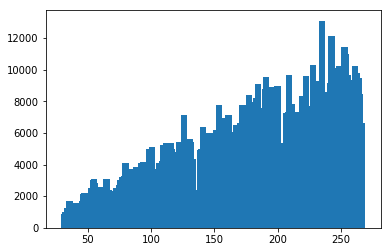

In [26]:
import matplotlib.pyplot as plt

plt.bar(train_data['Item_MRP'], train_data['Item_Outlet_Sales'], width = 5)

<BarContainer object of 8523 artists>

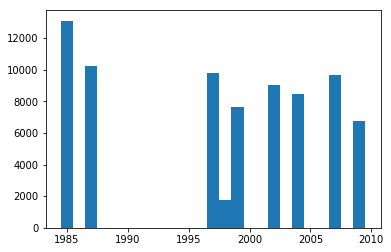

In [31]:
plt.bar(train_data['Outlet_Establishment_Year'], train_data['Item_Outlet_Sales'], width = 1)

<BarContainer object of 8523 artists>

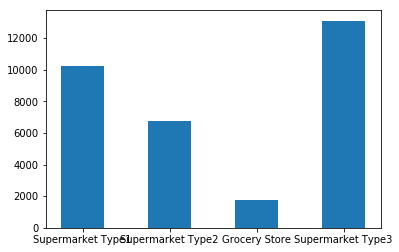

In [33]:
plt.bar(train_data['Outlet_Type'], train_data['Item_Outlet_Sales'], width = 0.5)

In [0]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']